In [288]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas import datetime

C:\Users\HP\AppData\Local\Temp\ipykernel_8904\1350854119.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [289]:
def parser(x):
    return datetime.strptime('202'+x,'%Y-%m')

In [290]:
File_Input_Path = "exam.csv"

series = pd.read_csv(File_Input_Path, parse_dates=[0], date_parser=parser)

In [291]:
df=series

In [292]:
df.head()

,Month,Sales
0,2021-01-01,266.0
1,2021-02-01,145.9
2,2021-03-01,183.1
3,2021-04-01,119.3
4,2021-05-01,180.3


In [293]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [294]:
df=df.set_index('Month')

<Axes: xlabel='Month'>

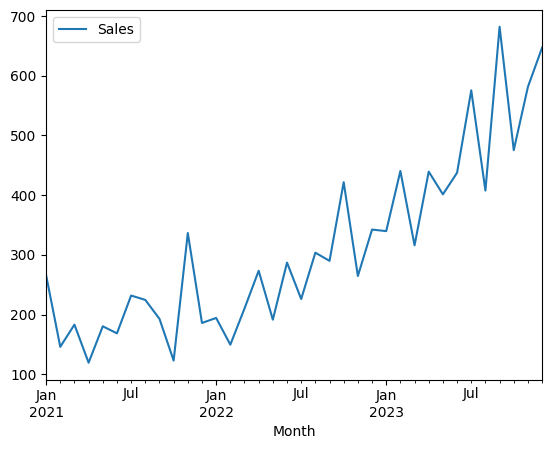

In [295]:
df.plot()

In [296]:
# just beacuse of moner santi
from statsmodels.tsa.stattools import adfuller
result=adfuller(df)
print(result)

(3.0601420836411797, 1.0, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, 278.9972644263031)


In [297]:
df['first_diff']=df-df.shift(1)


In [298]:

adfuller(df['first_diff'].dropna())

(-7.249074055553856,
 1.7998574141687034e-10,
 1,
 33,
 {'1%': -3.6461350877925254,
  '5%': -2.954126991123355,
  '10%': -2.6159676124885216},
 275.32503579406307)

In [299]:
size=int(len(df)*0.66)
train=df[:size]
test=df[size:]

In [300]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [301]:
auto_arima(df['first_diff'].dropna(),  trace=True)

Performing stepwise search to minimize aic


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=406.022, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=409.013, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=429.229, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=403.628, Time=0.33 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=404.692, Time=0.53 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=404.286, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=402.467, Time=0.63 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=401.531, Time=1.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.53 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.59 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
To

ARIMA(order=(1, 0, 2), scoring_args={}, suppress_warnings=True)

In [302]:
model=ARIMA(train['first_diff'],order=(1, 0, 2))
result=model.fit()
result.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             first_diff   No. Observations:                   23
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -121.724
Date:                Wed, 24 Jan 2024   AIC                            253.447
Time:                        20:09:01   BIC                            259.125
Sample:                    01-01-2021   HQIC                           254.875
                         - 11-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4457      3.021      2.134      0.033       0.525      12.366
ar.L1         -0.8589      0.348     -2.470      0.014      -1.540      -0.177
ma.L1         -0.3401    141.402     -0.002      0.998    -277.484     276.803
ma.L2         -0.6595     93.144     -0.007      0.994    -183.218     181.899
sigma2      3181.0465   4.48e+05      0.007      0.994   -8.76e+05    8.82e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 1.97
Prob(Q):                              0.63   Prob(JB):                         0.37
Heteroskedasticity (H):               1.67   Skew:                             0.71
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [303]:
df['pred']=result.predict(start=len(train),end=len(df)-1)

In [304]:
df.tail(15)

,Sales,first_diff,pred
Month,,,
2022-10-01,421.6,131.7,NaN
2022-11-01,264.5,-157.1,NaN
2022-12-01,342.3,77.8,65.241187
2023-01-01,339.7,-2.6,-45.095901
2023-02-01,440.4,100.7,50.715078
2023-03-01,315.9,-124.5,-31.577354
2023-04-01,439.3,123.4,39.103944
2023-05-01,401.3,-38.0,-21.604506
2023-06-01,437.4,36.1,30.538225


## first method that i teach you before

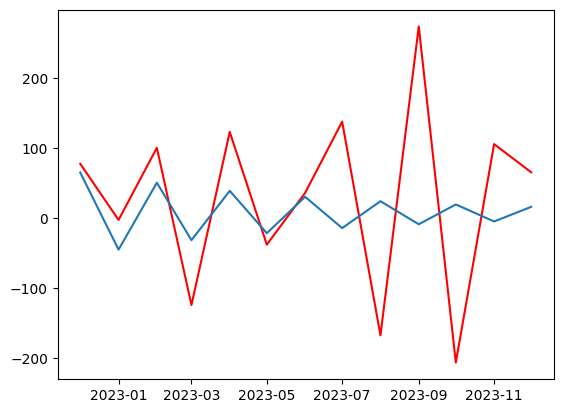

In [306]:
plt.plot(test['first_diff'],color='red')
plt.plot(df['pred'])

In [308]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(test['first_diff'], df['pred'].dropna()))
rms

132.0711801551858

## above plot is nonseasonal and stationary so the prediction is also right but the below code is prediction between old value of sales column

In [309]:
df['Sales_predict']=df['Sales'].shift(1)+df['pred']

In [310]:
df.tail(14)

,Sales,first_diff,pred,Sales_predict
Month,,,,
2022-11-01,264.5,-157.1,NaN,NaN
2022-12-01,342.3,77.8,65.241187,329.741187
2023-01-01,339.7,-2.6,-45.095901,297.204099
2023-02-01,440.4,100.7,50.715078,390.415078
2023-03-01,315.9,-124.5,-31.577354,408.822646
2023-04-01,439.3,123.4,39.103944,355.003944
2023-05-01,401.3,-38.0,-21.604506,417.695494
2023-06-01,437.4,36.1,30.538225,431.838225
2023-07-01,575.5,138.1,-14.247375,423.152625


In [311]:
## rmse is same for both and both are also right
rms = np.sqrt(mean_squared_error(df['Sales_predict'].dropna(), test['Sales']))
rms

132.0711801551858

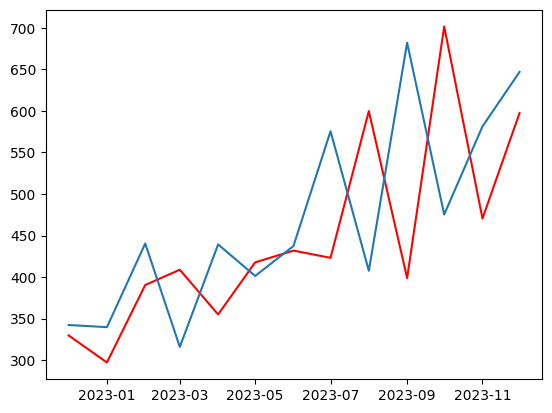

In [314]:
plt.plot(df['Sales_predict'], color='red')
plt.plot(test['Sales'])